# **Chapter 1. Data shape 1 -> 1**

In [ ]:
import tensorflow as tf
import numpy as np

#stage1: 1 input(strike price) & 1 output(option price)
def call_option(S, u, d, r, K):
  prob = (r-d)/(u-d)
  value = 1/r * (max(u*S - K, 0) * prob + max(d*S - K, 0) * (1-prob))
  return value

#Fix parameters except K: (S, u, d, r) = (100, 1.1, 0.9, 1.05) 
#Make toy training dataset (one-step binomial pricing formula)
strike = []
option = []
for K in range(70, 160, 5):
  strike.append(K)
  option.append(call_option(100, 1.1, 0.9, 1.05, K))

#our desired first training dataset
strike_price = np.array(strike)
option_price = np.array(option)



In [ ]:
print(strike_price)
print(option_price)

[ 70  75  80  85  90  95 100 105 110 115 120 125 130 135 140 145 150 155]
[3.33333333e+01 2.85714286e+01 2.38095238e+01 1.90476190e+01
 1.42857143e+01 1.07142857e+01 7.14285714e+00 3.57142857e+00
 1.01506105e-14 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]


In [ ]:
#make a testing dataset for our first model
strike_t = []
option_t = []
for K in range(82, 122, 5):
  strike_t.append(K)
  option_t.append(call_option(100, 1.1, 0.9, 1.05, K))

test_strike_price = np.array(strike_t)
test_option_price = np.array(option_t)

In [ ]:
print(test_strike_price)
print(test_option_price)

[ 82  87  92  97 102 107 112 117]
[21.9047619  17.14285714 12.85714286  9.28571429  5.71428571  2.14285714
  0.          0.        ]


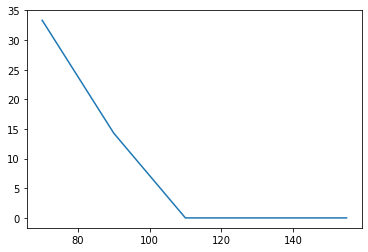

In [ ]:
#check how our training set looks
import matplotlib.pyplot as plt

plt.plot(strike_price, option_price)

In [ ]:
#A simple neural network with 2 layers, activation='relu'
first_model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=2, input_shape=[1], activation='relu'),
  tf.keras.layers.Dense(units=1)
  ])

#set complier
first_model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

#Training the model
history = first_model.fit(strike_price, option_price, epochs=1000, verbose=False)
print("Finished training the model")

Finished training the model


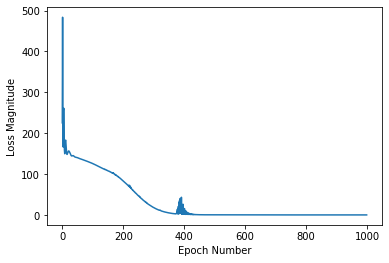

In [ ]:
#Training statistics
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

In [ ]:
#evaluate our first model
first_model.evaluate(strike_price, option_price)

1/1 [==============================] - 0s 1ms/step - loss: 0.2062


0.20621100068092346

In [ ]:
first_model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 2)                 4         
_________________________________________________________________
dense_55 (Dense)             (None, 1)                 3         
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________


In [ ]:
first_model.get_weights()

[array([[-1.1208937 , -0.20147355]], dtype=float32),
 array([ 0.      , 21.761806], dtype=float32),
 array([[0.51344776],
        [4.2487464 ]], dtype=float32),
 array([1.6534268e-07], dtype=float32)]

In [ ]:
#use pre-made testing set to check how well the network is trained
predict=first_model.predict(test_strike_price)

In [ ]:
#this np.array shows the strike price to the model-predicted value to the actual value
result=[]
for i in range (0, 8):
  result.append([test_strike_price[i], predict[i], test_option_price[i]])
result_array=np.array(result)

In [ ]:
print(result_array)

[[82 array([22.26754], dtype=float32) 21.90476190476191]
 [87 array([17.987526], dtype=float32) 17.14285714285715]
 [92 array([13.707511], dtype=float32) 12.857142857142865]
 [97 array([9.427491], dtype=float32) 9.285714285714294]
 [102 array([5.1474776], dtype=float32) 5.714285714285723]
 [107 array([0.86746806], dtype=float32) 2.1428571428571526]
 [112 array([1.0009026e-05], dtype=float32) 0.0]
 [117 array([1.0009026e-05], dtype=float32) 0.0]]


# **Chapter 2. Data Shape 2 -> 1**

In [ ]:
#two inputs: S, K training set
pair=[]
option_pair=[]
for i in range (70, 140, 5):
  for j in range (70, 140, 5):
    pair.append([i,j])
    option_pair.append(call_option(i, 1.1, 0.9, 1.05, j))

print(pair)
print(option_pair)

[[70, 70], [70, 75], [70, 80], [70, 85], [70, 90], [70, 95], [70, 100], [70, 105], [70, 110], [70, 115], [70, 120], [70, 125], [70, 130], [70, 135], [75, 70], [75, 75], [75, 80], [75, 85], [75, 90], [75, 95], [75, 100], [75, 105], [75, 110], [75, 115], [75, 120], [75, 125], [75, 130], [75, 135], [80, 70], [80, 75], [80, 80], [80, 85], [80, 90], [80, 95], [80, 100], [80, 105], [80, 110], [80, 115], [80, 120], [80, 125], [80, 130], [80, 135], [85, 70], [85, 75], [85, 80], [85, 85], [85, 90], [85, 95], [85, 100], [85, 105], [85, 110], [85, 115], [85, 120], [85, 125], [85, 130], [85, 135], [90, 70], [90, 75], [90, 80], [90, 85], [90, 90], [90, 95], [90, 100], [90, 105], [90, 110], [90, 115], [90, 120], [90, 125], [90, 130], [90, 135], [95, 70], [95, 75], [95, 80], [95, 85], [95, 90], [95, 95], [95, 100], [95, 105], [95, 110], [95, 115], [95, 120], [95, 125], [95, 130], [95, 135], [100, 70], [100, 75], [100, 80], [100, 85], [100, 90], [100, 95], [100, 100], [100, 105], [100, 110], [100, 115

In [ ]:
#make testing set
test_pair=[]
test_option_pair=[]
for i in range (72, 142, 5):
  for j in range (72, 142, 5):
    test_pair.append([i,j])
    test_option_pair.append(call_option(i, 1.1, 0.9, 1.05, j))

print(test_pair)
print(test_option_pair)

[[72, 72], [72, 77], [72, 82], [72, 87], [72, 92], [72, 97], [72, 102], [72, 107], [72, 112], [72, 117], [72, 122], [72, 127], [72, 132], [72, 137], [77, 72], [77, 77], [77, 82], [77, 87], [77, 92], [77, 97], [77, 102], [77, 107], [77, 112], [77, 117], [77, 122], [77, 127], [77, 132], [77, 137], [82, 72], [82, 77], [82, 82], [82, 87], [82, 92], [82, 97], [82, 102], [82, 107], [82, 112], [82, 117], [82, 122], [82, 127], [82, 132], [82, 137], [87, 72], [87, 77], [87, 82], [87, 87], [87, 92], [87, 97], [87, 102], [87, 107], [87, 112], [87, 117], [87, 122], [87, 127], [87, 132], [87, 137], [92, 72], [92, 77], [92, 82], [92, 87], [92, 92], [92, 97], [92, 102], [92, 107], [92, 112], [92, 117], [92, 122], [92, 127], [92, 132], [92, 137], [97, 72], [97, 77], [97, 82], [97, 87], [97, 92], [97, 97], [97, 102], [97, 107], [97, 112], [97, 117], [97, 122], [97, 127], [97, 132], [97, 137], [102, 72], [102, 77], [102, 82], [102, 87], [102, 92], [102, 97], [102, 102], [102, 107], [102, 112], [102, 117

In [ ]:
#the second model is 2 inputs and 1 output
second_model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=2, input_shape=[2], activation='relu'),
  tf.keras.layers.Dense(units=1)
  ])

#set complier
second_model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

#Training the model
history_p = second_model.fit(pair, option_pair, epochs=1000, verbose=False)
print("Finished training the model")

Finished training the model


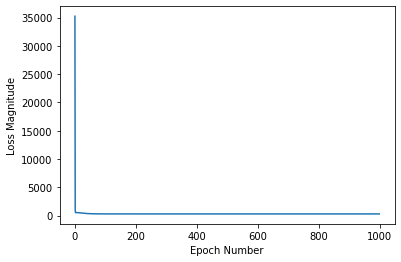

In [ ]:
#Training statistics
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history_p.history['loss'])

In [ ]:
#evaluate second model
second_model.evaluate(pair, option_pair)

7/7 [==============================] - 0s 1ms/step - loss: 0.4865


0.4864985942840576

In [ ]:
#use pre-made testing set to check how well the network is trained
predict_p=second_model.predict(test_pair)

In [ ]:
#this np.array shows the strike price to the model-predicted value to the actual value
result_p=[]
for i in range (0, 196):
  result_p.append([test_pair[i], predict_p[i], test_option_pair[i]])
result_p_array=np.array(result_p)

In [ ]:
print(result_p_array)

# **Chapter 3. Data shape 3 -> 2**

In [ ]:
#Using Put-call parity to detect arbitrage chances
#In some cases there will be oppertunities for arbitrage
#we will fix the strike price K to 100 and rate r to 1.1
def put_option_price(C, S, r, K):
  put = C - S + K*(1/r)
  return put

In [ ]:
#create training dataset in the case satisfying put-call parity
#the first index in output tells us if there is an arbitrage oppertunity
#the second intex in output tells us the amount of arbitrage
triples = []
output = []
for i in range (5, 55, 5):
  for j in range (80, 130, 5):
    triples.append([i, j, put_option_price(i, j, 1.1, 100)])
    output.append([0, 0])
#create training set that is random
triples_random = []
output_random = []
for i in range (20, 45, 5):
  for j in range (90, 115, 5):
    for k in range (10, 35, 5):
      triples_random.append([i, j, k])
      output_random.append([1, k - put_option_price(i, j, 1.1, 100)])

input = triples + triples_random
output_final = output + output_random

In [ ]:
input_array = np.array(input)
output_array = np.array(output_final)
print(input_array)
print(output_array)

In [ ]:
#make test dataset
test_input = []
test_output = []
for i in range (7, 57, 5):
  for j in range (82, 132, 5):
    test_input.append([i, j, put_option_price(i, j, 1.1, 100)])
    test_output.append([0, 0])

test_input_rand = []
test_output_rand = []
for i in range (22, 47, 5):
  for j in range (92, 117, 5):
    for k in range (12, 37, 5):
      test_input_rand.append([i, j, k])
      test_output_rand.append([1, k - put_option_price(i, j, 1.1, 100)])


In [ ]:
#the third model is 3 inputs and 2 outputs
third_model = tf.keras.Sequential([
  tf.keras.layers.Dense(units=3, input_shape=[3], activation='relu'),
  tf.keras.layers.Dense(units=2)
  ])

#set complier
third_model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

#Training the model
history_q = third_model.fit(input_array, output_array, epochs=1000, verbose=False)
print("Finished training the model")

Finished training the model


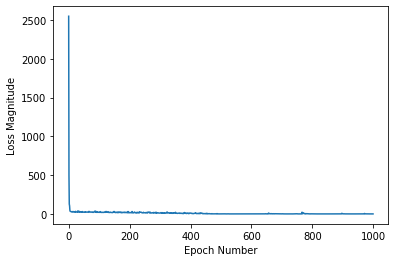

In [ ]:
#Training statistics
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history_q.history['loss'])

In [ ]:
#evaluate third model
third_model.evaluate(input_array, output_array)

8/8 [==============================] - 0s 1ms/step - loss: 0.2338


0.2337617427110672

In [ ]:
#use pre-made testing set to check how well the network is trained
test_input_set = test_input + test_input_rand
test_output_set = test_output + test_output_rand
predict_r=third_model.predict(test_input_set)

In [ ]:
#this np.array shows the strike price to the model-predicted value to the actual value
result_r=[]
for i in range (0, 225):
  result_r.append([test_input_set[i], predict_r[i], test_output_set[i]])
result_r_array=np.array(result_r)

In [ ]:
print(result_r_array)